<div style="text-align: center;">
  <h1 style="margin-top: 10px;">🔹 Livrable 2 – EasySave v1.1-EasySave v2.0</h1>
</div>


## Objectif du livrable

Ce livrable marque une étape importante dans l’évolution du projet **EasySave**, développé pour l’éditeur **ProSoft**, en réponse aux besoins exprimés par les utilisateurs finaux et les exigences internes en matière de **qualité logicielle**, **maintenabilité** et **extensibilité**.

Il couvre deux livraisons complémentaires :

- **EasySave v1.1** : une mise à jour fonctionnelle de la version console (*v1.0*), apportant notamment le **choix du format de journalisation** (*JSON ou XML*).

- **EasySave v2.0** : une version majeure dotée d’une **interface graphique WPF** et d’un ensemble de **nouvelles fonctionnalités étendues**.

Ces deux versions visent à renforcer :
- l’**utilisabilité**
- l’**adaptabilité**
- la **performance**

de l’outil dans des **environnements professionnels exigeants**.


## Fonctionnalités principales – EasySave v2.0

---

### 1. Interface graphique (GUI)

- Remplacement complet de l’application console par une **interface graphique moderne** développée avec **WPF** (ou **Avalonia** en alternative).
- Interface **bilingue** (Français / Anglais) avec **chargement dynamique des ressources**.
- Navigation intuitive pour :
  - Consulter
  - Créer
  - Modifier
  - Exécuter les travaux de sauvegarde.

---

### 2. Gestion des travaux de sauvegarde

- **Création**, **modification**, **suppression** et **exécution** d’un **nombre illimité** de travaux.
- Chaque travail comprend :
  - Un **nom**
  - Un **chemin source**
  - Un **chemin cible**
  - Un **type** : sauvegarde **complète** ou **différentielle**
- Sauvegardes exécutables de façon **individuelle ou séquentielle**.

---

### 3. Fichier de log journalier

- Journalisation des actions dans un fichier log **en temps réel**, pour chaque sauvegarde.
- Contenu du log :
  - **Horodatage**
  - **Nom du travail**
  - **Chemin source (UNC)**
  - **Chemin cible (UNC)**
  - **Taille du fichier**
  - **Temps de transfert (ms)**
  - **Temps de cryptage (ms)** ou **code d’erreur** :
    - `0` → pas de cryptage
    - `> 0` → temps réel du cryptage
    - `< 0` → code erreur
- **Format JSON ou XML** (choix utilisateur via les paramètres).
- Fonctionnalité encapsulée dans une **DLL réutilisable et rétrocompatible**.

---

### 4. Fichier d’état temps réel (`state.json`)

- Génération d’un fichier `state.json` contenant les informations suivantes par travail :
  - Nom du travail
  - Horodatage de la dernière action
  - État : **Actif** / **Non actif**
  - Nombre total de fichiers à traiter
  - Taille totale des fichiers
  - Nombre et taille des fichiers restants
  - Chemin source et cible du **fichier en cours**
- **Mise à jour en continu** pendant l’exécution.

---

### 5. Cryptage des fichiers (CryptoSoft)

- Intégration du logiciel externe **CryptoSoft**.
- Cryptage uniquement des fichiers dont **l’extension est définie** par l’utilisateur (via les paramètres).
- **Mesure et journalisation du temps de cryptage** par fichier dans les logs.

---

### 6. Détection de logiciel métier

- Vérification **en arrière-plan** de la présence d’un **logiciel métier** (défini par l’utilisateur, ex. `calc.exe`).
- Si détecté :
  - Le logiciel termine la **sauvegarde du fichier en cours**.
  - Les **autres sauvegardes sont interrompues**.
  - L’événement est consigné dans le **fichier log**.

---

### 7. Configuration générale

- Paramètres utilisateur configurables :
  - **Format de log** : JSON ou XML
  - **Extensions à crypter**
  - **Nom du logiciel métier** à surveiller
- Sauvegarde des préférences dans un fichier **`settings.json`**.

---


# Modélisation UML initiale

Afin de garantir une **conception claire et structurée** d’_EasySave_, nous avons réalisé plusieurs **diagrammes UML** dès les premières étapes du projet.

---

## Objectifs de la modélisation

Cette modélisation nous a permis de :

- **Visualiser le fonctionnement global du logiciel**,
- **Organiser les responsabilités** entre les différents composants,
- **Poser les bases du développement** de manière rigoureuse et professionnelle.

---

## Rôle des différents diagrammes

Chaque diagramme UML a un objectif précis :

- **Diagrammes de cas d’utilisation** : représenter les **besoins fonctionnels**,
- **Diagrammes de séquence** : modéliser le **comportement de l’utilisateur** avec le système,
- **Diagrammes d’activités** : illustrer la **logique des traitements**,
- **Diagramme de classes** : structurer **l’architecture du code**.

---

## Une approche méthodique

Cette approche UML nous a permis de :

- **Travailler avec méthode** et anticiper les difficultés,
- **Faciliter la collaboration** au sein de l’équipe projet,
- **Assurer la maintenabilité** et l’évolutivité de l’application dans ses futures versions.

---

Les différents diagrammes sont présentés et expliqués dans les sections suivantes.


## 🔹 Étape 1 : Diagramme de cas d'utilisation – EasySave v2.0

Le diagramme de cas d'utilisation ci-dessous représente les interactions principales entre l’utilisateur et le logiciel **EasySave**, dans sa version graphique (WPF).

Il s’inscrit dans le cadre de l’évolution du projet vers une interface plus conviviale et des fonctionnalités avancées, tout en conservant les fondamentaux de la version précédente.

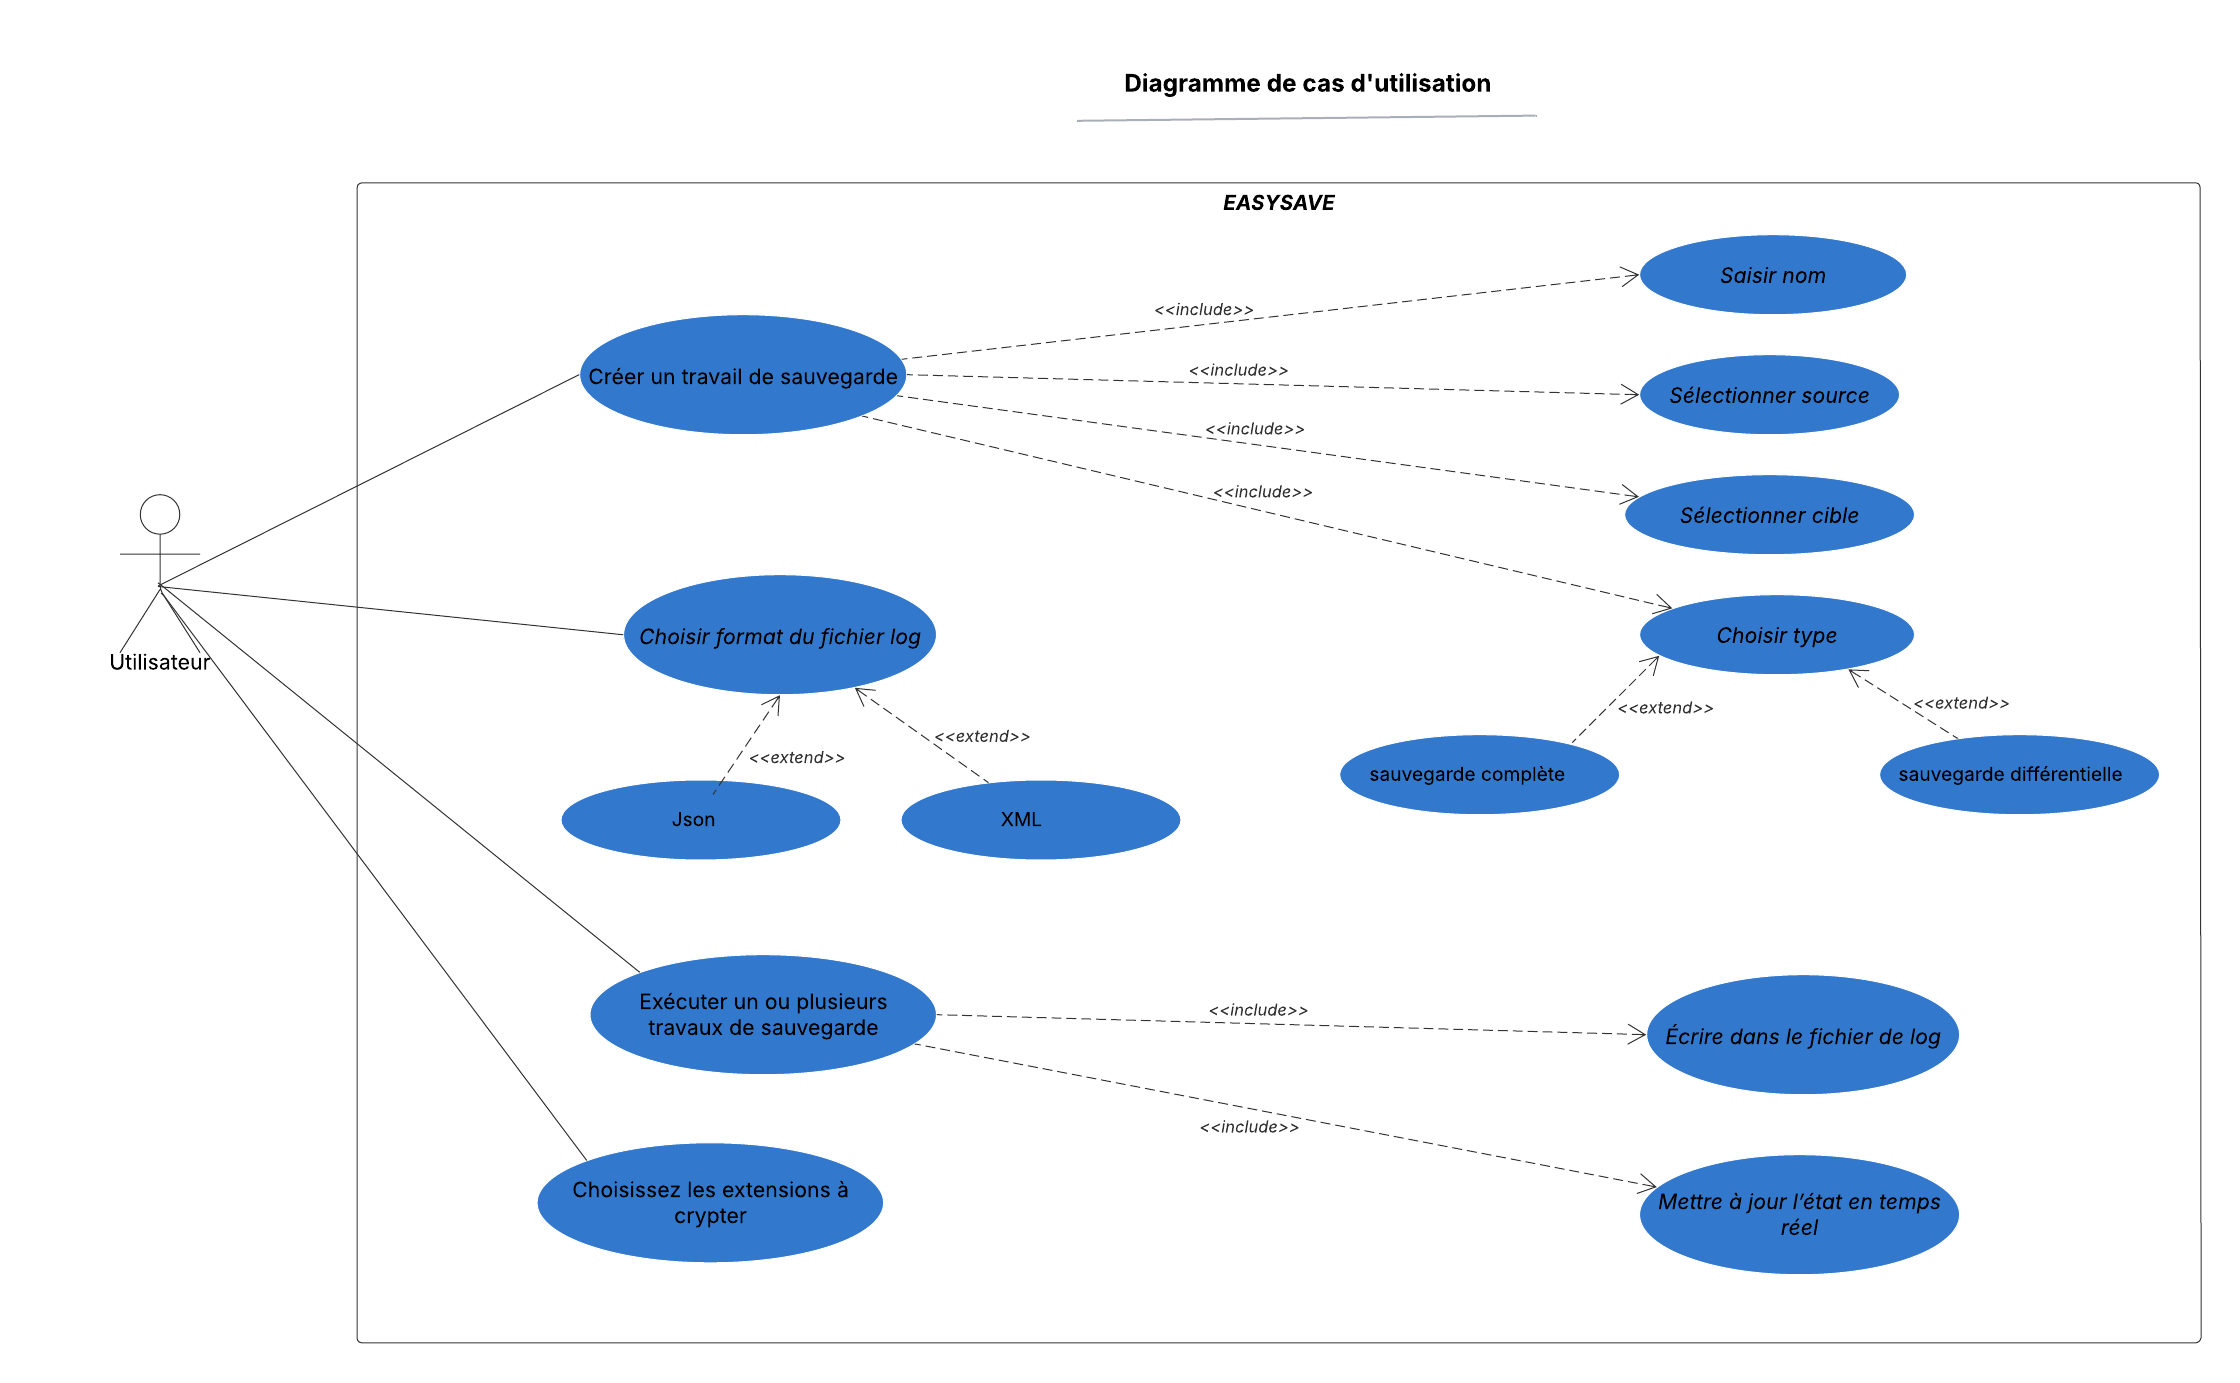

### Acteur : Utilisateur

L’acteur principal est l’**Utilisateur**, qui interagit avec le logiciel via une **interface graphique multilingue** (FR/EN).

Il peut :
- Gérer les travaux de sauvegarde
- Exécuter les sauvegardes
- Configurer des paramètres spécifiques (format du log, extensions à crypter, etc.)

---

### Cas d’utilisation principaux

#### Créer un travail de sauvegarde

Ce cas d’utilisation regroupe les étapes nécessaires à la définition d’un nouveau travail, avec les inclusions suivantes :

- `<<include>>` Saisir nom : donner un nom explicite au travail.
- `<<include>>` Sélectionner source : choisir le répertoire à sauvegarder.
- `<<include>>` Sélectionner cible : définir le répertoire de destination.
- `<<include>>` Choisir type : définir le mode de sauvegarde :
  - `<<extend>>` Sauvegarde complète
  - `<<extend>>` Sauvegarde différentielle

---

#### Choisir le format du fichier log

L’utilisateur peut sélectionner le **format de journalisation** souhaité pour les opérations de sauvegarde :

- `<<extend>>` JSON
- `<<extend>>` XML

Cette option est accessible depuis les **paramètres globaux** du logiciel.

---

#### Choisir les extensions à crypter

L’utilisateur peut spécifier les **types de fichiers à crypter**, selon leur extension, via une interface dédiée.

Cette configuration sera utilisée pour activer le **cryptage conditionnel** via **CryptoSoft**.

---

#### Exécuter un ou plusieurs travaux de sauvegarde

L’utilisateur peut exécuter un ou plusieurs travaux, de manière **manuelle ou séquentielle**. Cette action implique automatiquement :

- `<<include>>` Écrire dans le fichier de log : chaque action réalisée pendant la sauvegarde est consignée dans un **fichier journal**.
- `<<include>>` Mettre à jour l’état en temps réel : les informations de progression sont enregistrées dans un **fichier d’état unique**.


## 🔹 Étape 2 : Diagramme de séquence – Exécution d’une sauvegarde (v2.0)

Le diagramme de séquence ci-dessous illustre le scénario d’exécution d’un travail de sauvegarde dans **EasySave v2.0**, version graphique.

Il met en évidence les interactions entre les composants du système impliqués dans le processus, de l’action de l’utilisateur jusqu’à la gestion des fichiers, de l’état et des logs (en JSON ou XML).

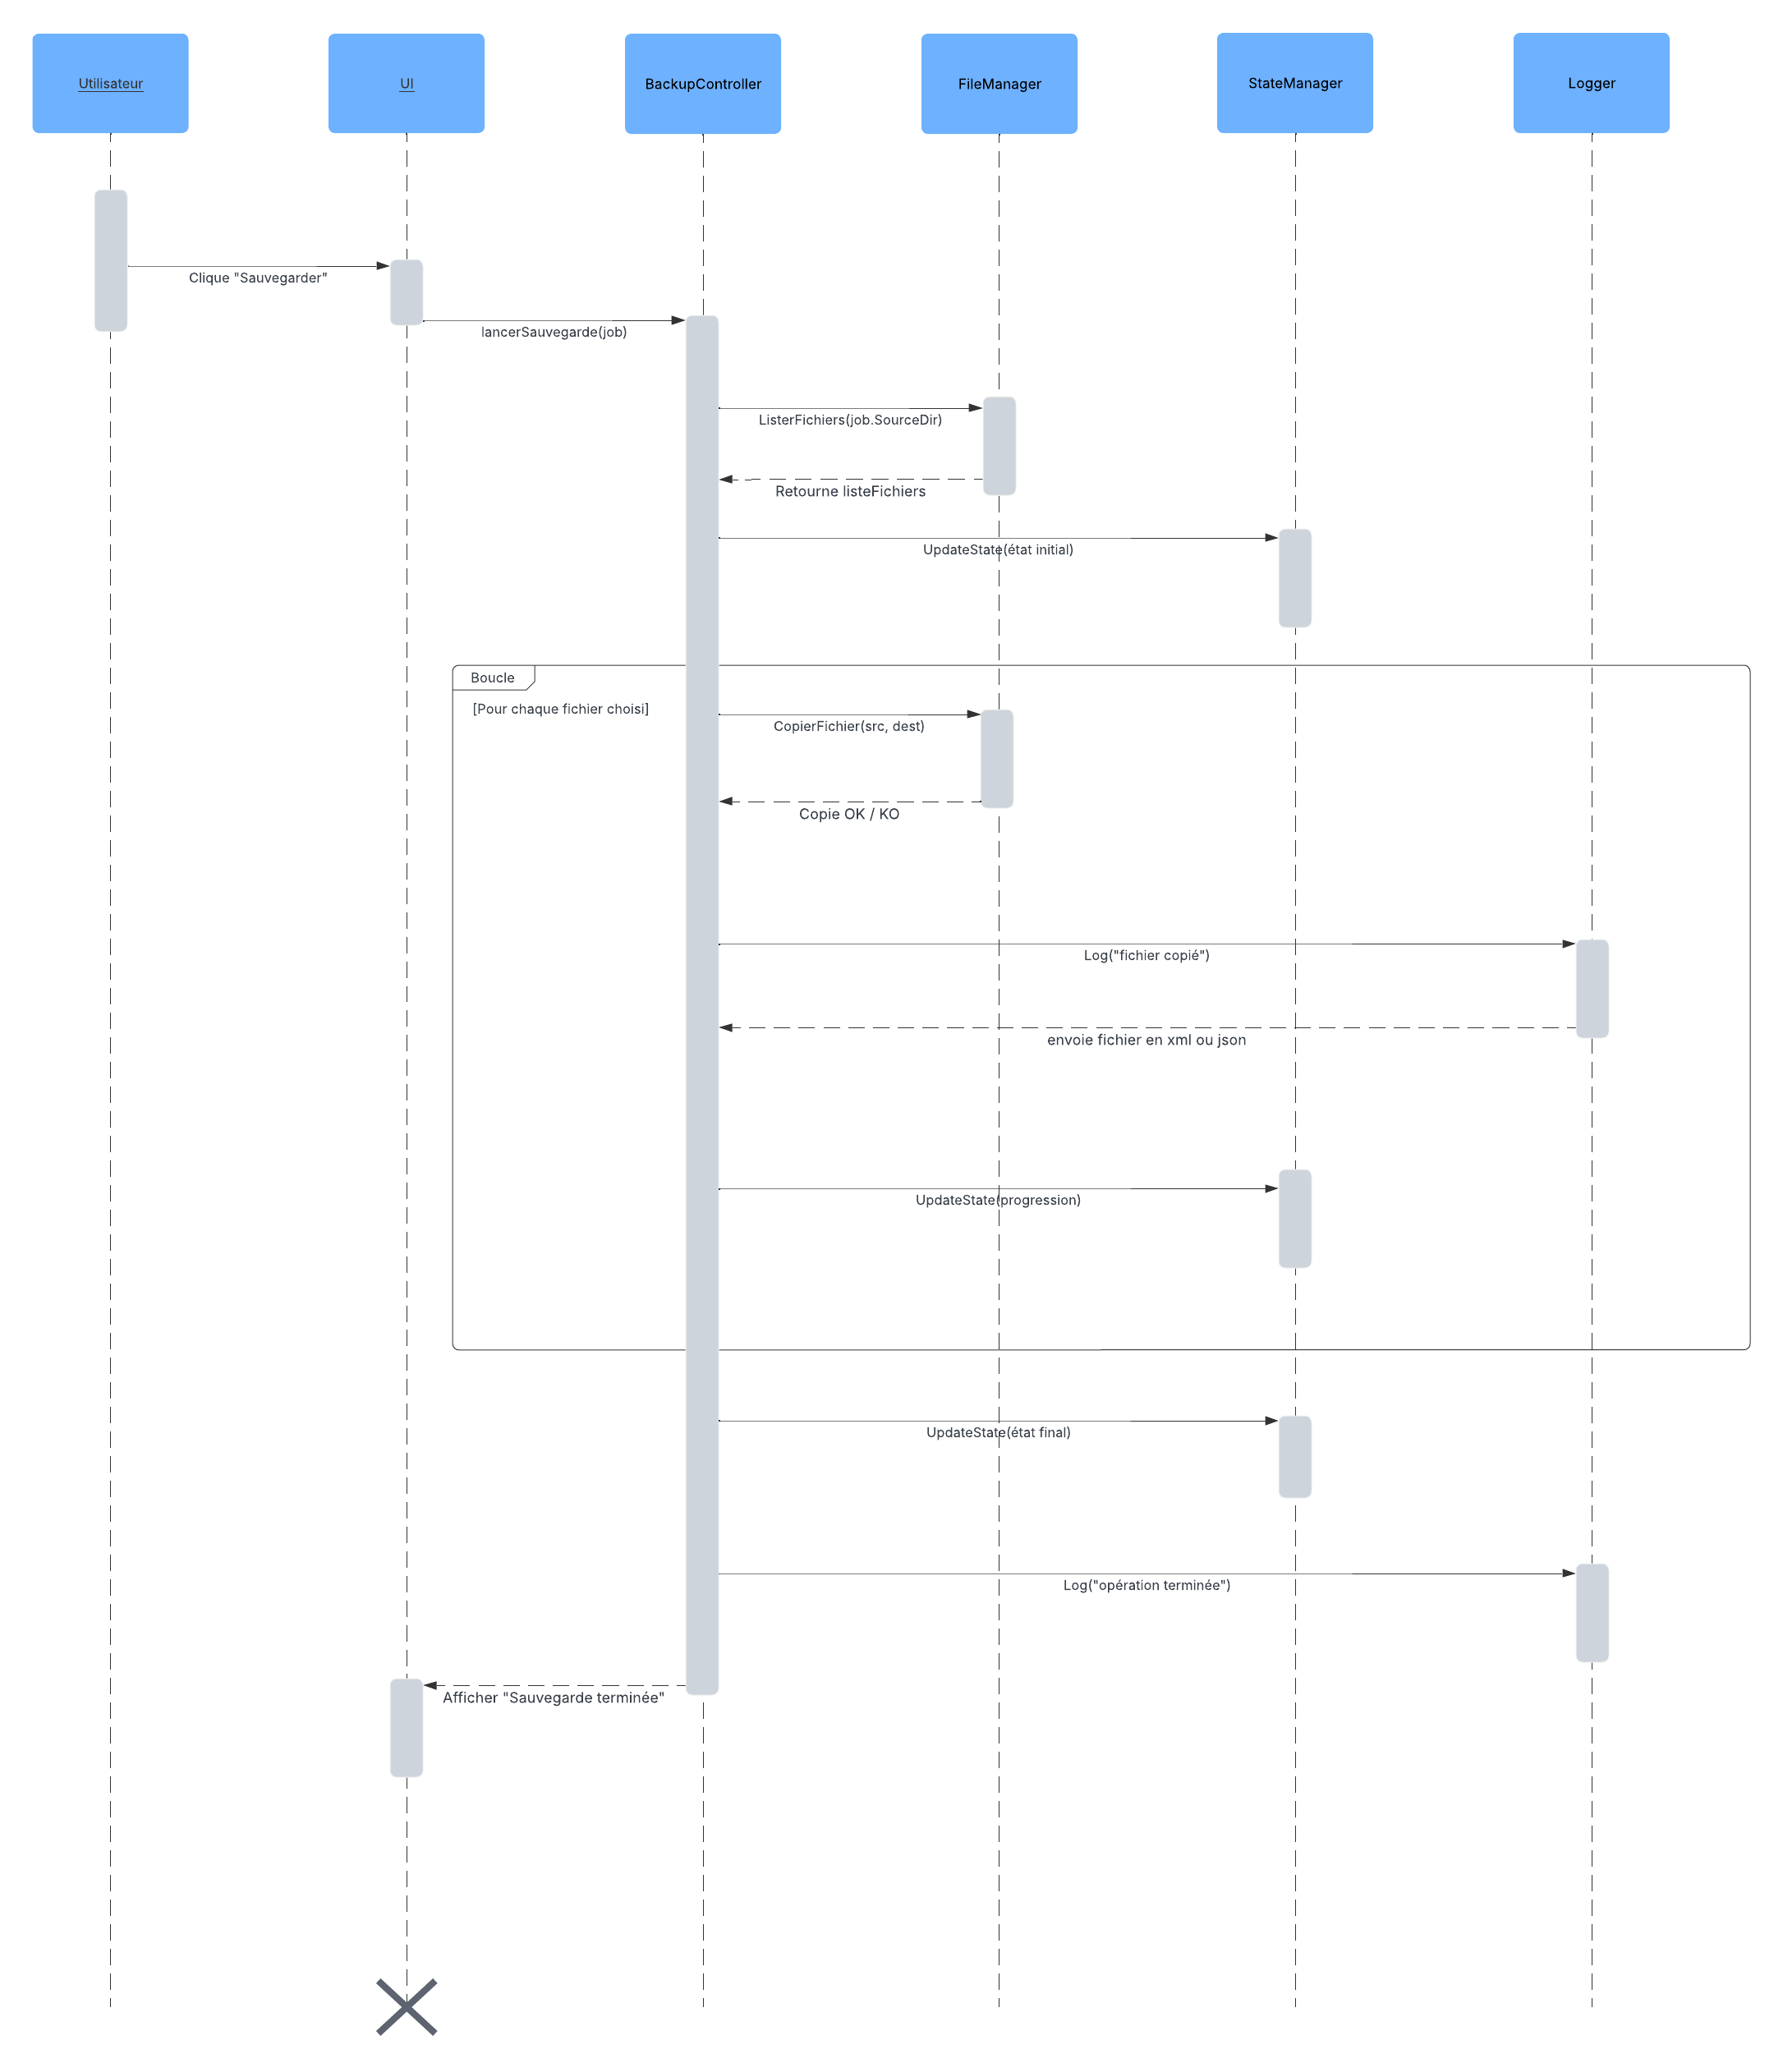
---

### Objectif

Ce diagramme détaille le déroulement complet de la commande **"Sauvegarder"**, dans le contexte de l’interface graphique.

Il présente les appels entre :
- l’interface utilisateur (**UI**),
- le contrôleur,
- les gestionnaires de fichiers,
- l’état,
- et le logger,

selon une logique modulaire propre au pattern **MVVM**.

---

### Objets participants

- **Utilisateur** : déclenche l’action depuis l’interface graphique.
- **UI (Interface graphique WPF)** : capte l’événement utilisateur (*Clic “Sauvegarder”*).
- **BackupController** : logique métier de la sauvegarde.
- **FileManager** : exploration des répertoires et gestion des copies.
- **StateManager** : mise à jour du fichier d’état temps réel.
- **Logger** : écriture des logs journaliers au format JSON ou XML.

---

### Séquence d’exécution

1. L’utilisateur clique sur le bouton **“Sauvegarder”** dans l’IHM.
2. L’interface appelle la méthode `lancerSauvegarde(job)` du **BackupController**.
3. Le **BackupController** interroge le **FileManager** via `ListerFichiers(job.SourceDir)` pour obtenir la liste complète des fichiers à sauvegarder.
4. Le **StateManager** est mis à jour avec l’état initial via `Update(state initial)`.

---

#### Boucle de traitement des fichiers

Pour chaque fichier à sauvegarder :

5. Le fichier est copié via `CopierFichier(src, dest)`.
6. Le résultat de la copie (OK / KO) est retourné.
7. Un appel `Log("fichier copié")` est envoyé au **Logger**.
8. Le **Logger** écrit une ligne de log dans le format choisi (**JSON ou XML**).
9. L’état de progression est mis à jour via `UpdateState(progression)` par le **StateManager**.

---

### Fin du processus

10. Une fois tous les fichiers traités :
    - Le **StateManager** reçoit `UpdateState(state final)` pour signaler la fin du traitement.
    - Le **Logger** écrit un message `Log("opération terminée")`.
11. L’interface affiche un message à l’utilisateur : **“Sauvegarde terminée”**.

---




## 🔹 Étape 3 : Diagramme d’activités – Parcours utilisateur dans EasySave v2.0

Ce diagramme d’activités présente le **parcours utilisateur global** au sein de l'application **EasySave v2.0**, désormais basée sur une **interface graphique WPF**.

Il reflète les différentes possibilités offertes à l’utilisateur dès le **lancement du logiciel**, jusqu’à l’**exécution ou la configuration** des travaux de sauvegarde.

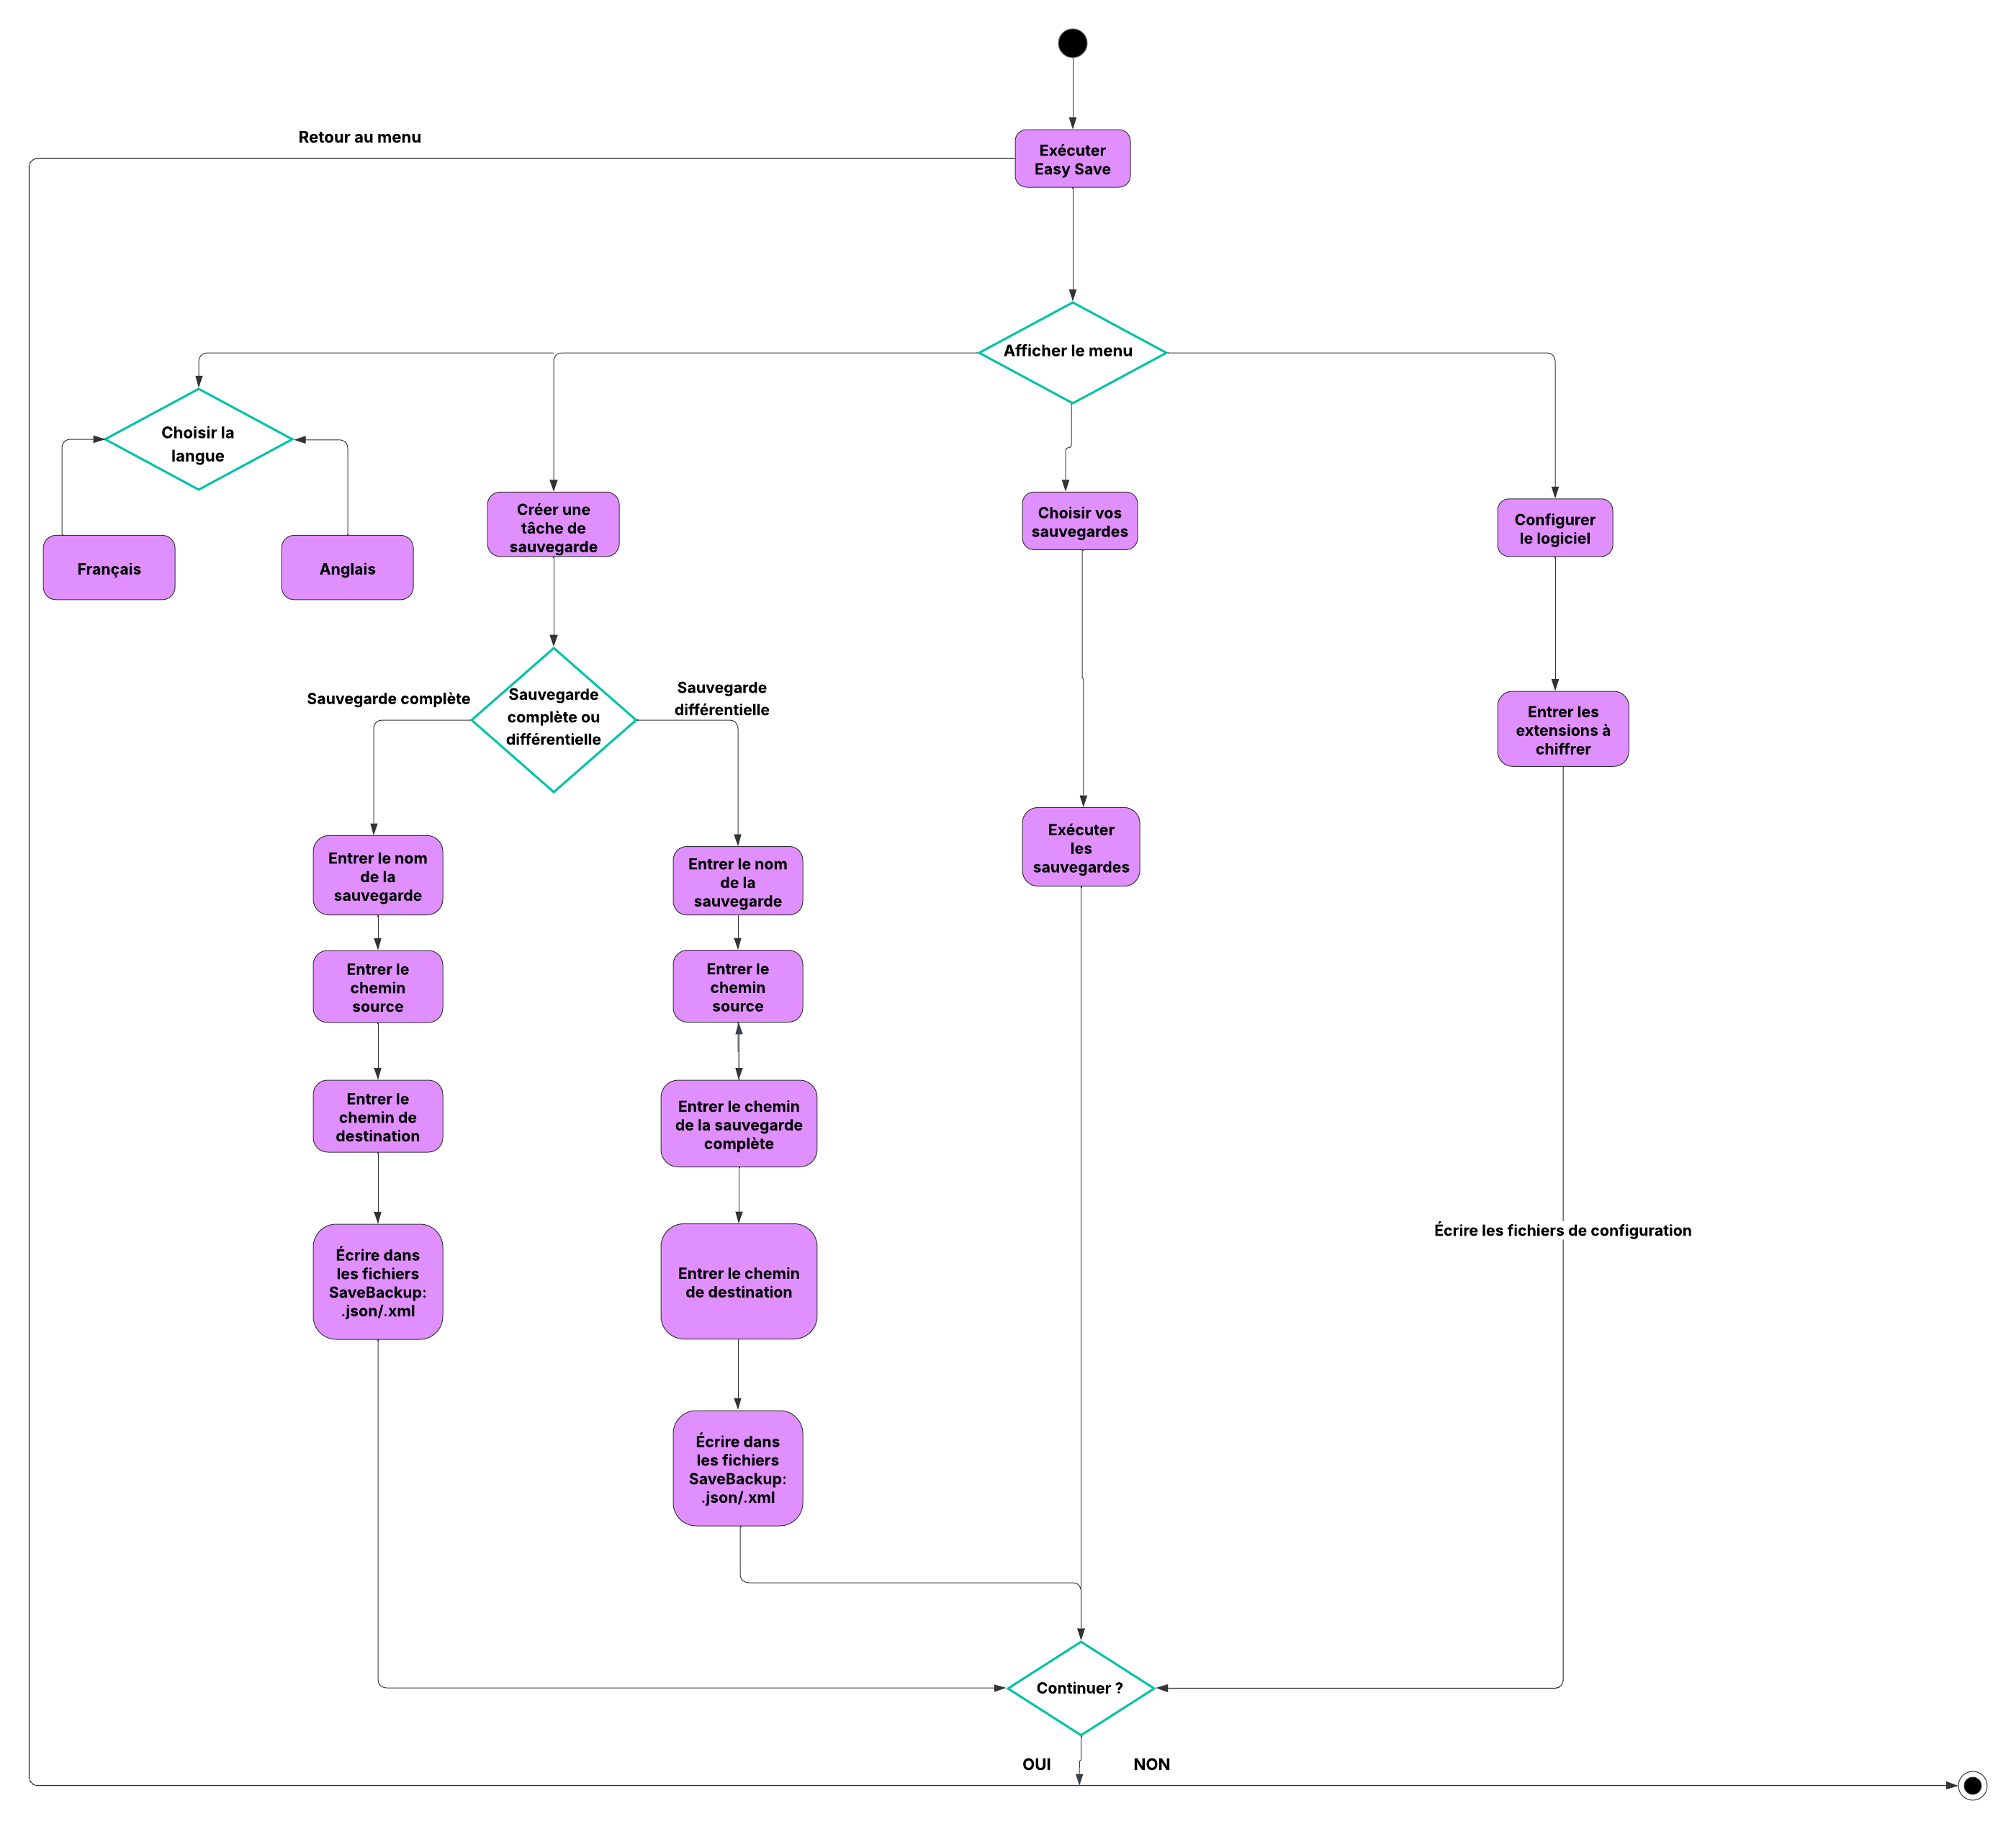

---

### Déroulement global

- L’utilisateur lance l’application via le bouton **"Exécuter EasySave"**.
- Le **menu principal** s’affiche, donnant accès à plusieurs fonctionnalités :
  - Choisir la langue (français ou anglais)
  - Créer un nouveau travail de sauvegarde
  - Exécuter des travaux existants
  - Configurer les extensions à chiffrer

---

### Choix de la langue

- L’utilisateur sélectionne la **langue d’affichage** dès l'entrée dans l'application.
- Cette langue s’applique à **l’ensemble de l’interface graphique**.

---

### Créer une tâche de sauvegarde

- L’utilisateur choisit de créer une sauvegarde **complète** ou **différentielle**.
- Il renseigne successivement :
  - Le **nom de la sauvegarde**
  - Le **chemin source**
  - Le **chemin de destination**
- Les informations sont ensuite enregistrées dans un fichier **`SaveBackup.json`** ou **`.xml`**, en fonction du **format choisi**.

---

### Exécuter les sauvegardes

- L’utilisateur peut exécuter une ou plusieurs sauvegardes déjà définies.
- Le logiciel déclenche alors :
  - La **copie des fichiers**
  - Le **journal des actions**
  - La **mise à jour de l’état en temps réel**

(cf. Étape 2 – Diagramme de séquence)

---

### Configurer le logiciel

L’utilisateur peut accéder à un module de configuration permettant de définir :

- Les **extensions de fichiers à chiffrer**
- Le **format de log** (JSON/XML)
- Le **logiciel métier à surveiller** *(non montré dans ce diagramme mais géré en arrière-plan)*

Les paramètres sont enregistrés dans des **fichiers de configuration persistants**.

---

### Retour ou poursuite

- À la fin de chaque séquence, l’utilisateur peut choisir de **continuer** ou de **retourner au menu principal**.
- Cela permet d’enchaîner les actions **sans redémarrer** l’application.

---

### ✅ Points importants

- Le diagramme reflète un **parcours utilisateur plus riche** et **interactif** que dans la version 1.0, grâce à l’interface graphique.
- Le **stockage des informations est modulaire** (JSON ou XML), offrant plus de **flexibilité** aux utilisateurs.
- Le logiciel reste **fidèle à ses fondamentaux** tout en intégrant de **nouvelles exigences fonctionnelles** (cryptage, paramétrage dynamique).
- La **séquence est fluide**, chaque étape orientant l'utilisateur **sans bloquer** les autres possibilités.


## 🔷 Étape 4 : Diagramme de classes – Architecture objet d’EasySave v2.0

Le diagramme de classes ci-dessous présente l’**architecture logicielle complète** d’EasySave version 2.0, réorganisée autour du pattern **MVVM (Model-View-ViewModel)** et enrichie de nouveaux modules fonctionnels : cryptage, gestion du format XML, détection de logiciel métier, etc.

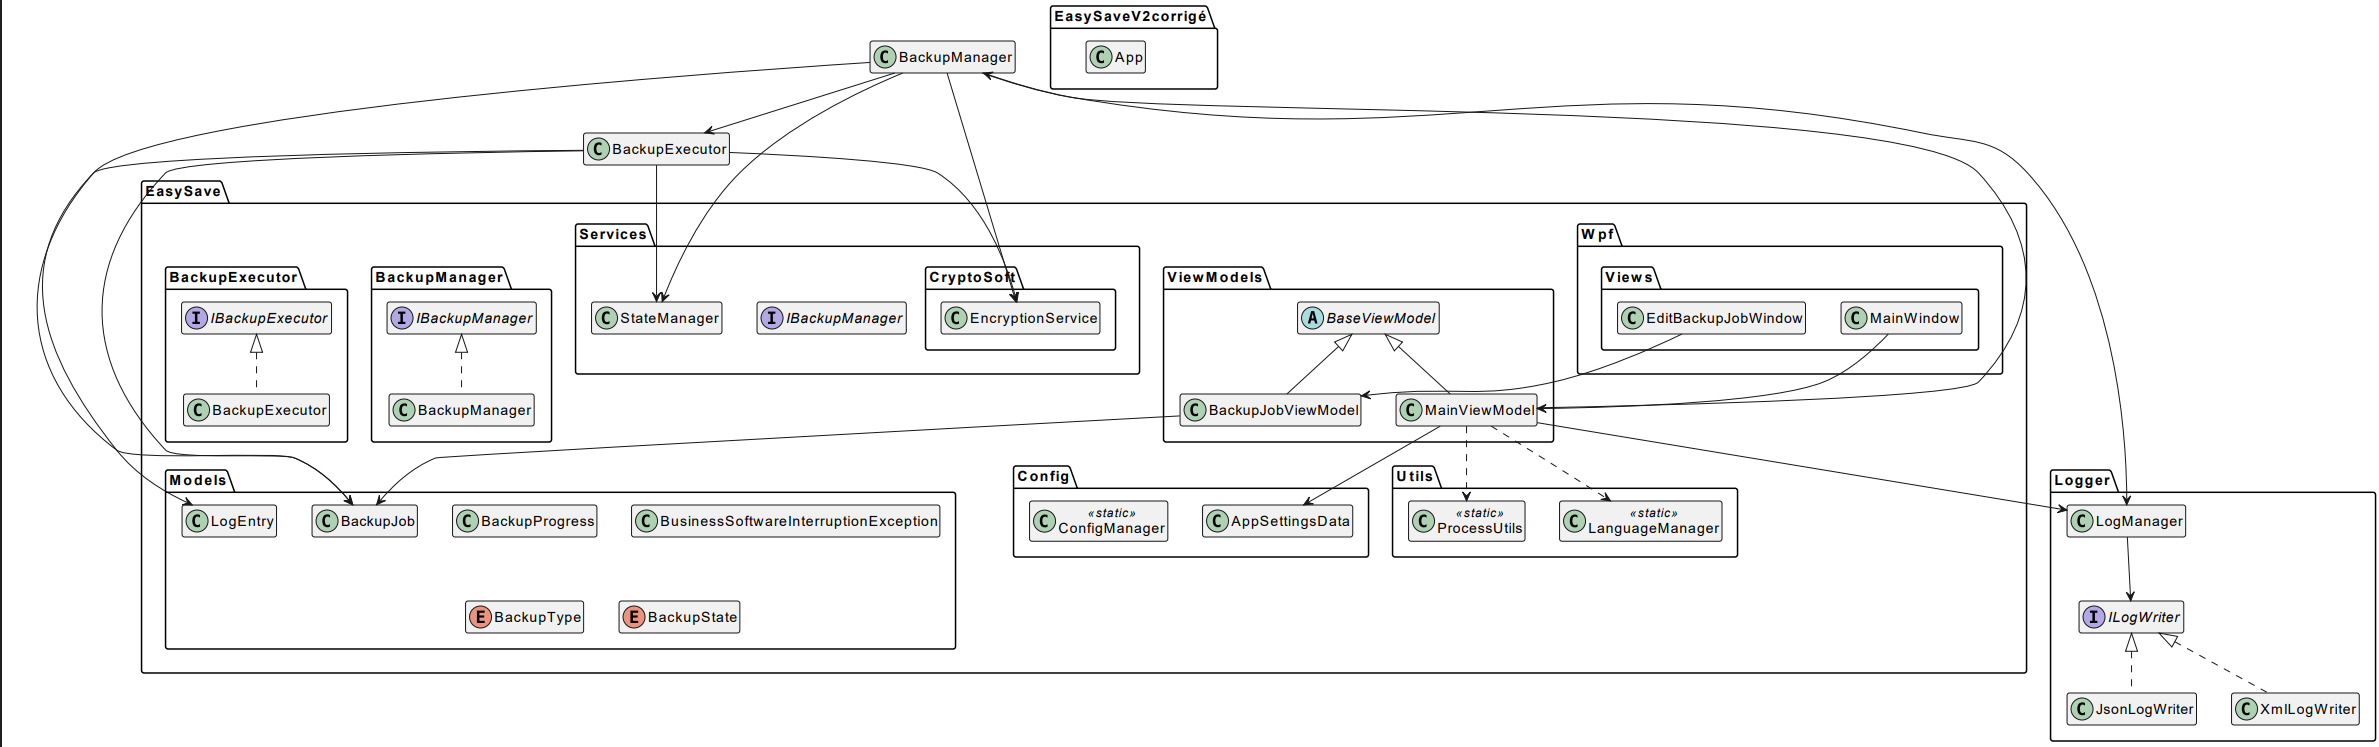

---

### Organisation générale

Le logiciel EasySave v2.0 est structuré selon une **architecture en couches**, favorisant la **lisibilité**, la **modularité** et l’**extensibilité** :

- Le **point d’entrée** de l’application est la classe `App`, qui initialise les composants principaux et la fenêtre principale (`MainWindow`).
- Le `MainViewModel` centralise les **interactions entre l’IHM et la logique métier**.

---

### Gestion des sauvegardes

Les classes du noyau fonctionnel sont les suivantes :

- `BackupManager` : responsable de la **gestion des sauvegardes** (création, exécution, filtrage…), implémente `IBackupManager`.
- `BackupExecutor` : exécute les sauvegardes, en interaction avec `FileManager` et `StateManager`.
- `BackupJob` : entité représentant un travail de sauvegarde (nom, source, cible, type…).
- `BackupType` : énumération des **types de sauvegarde**.
- `BackupProgress` / `BackupState` : objets liés au **suivi d’état** et à l’**avancement**.

---

### Gestion des logs

Le sous-système de journalisation repose sur une **architecture polymorphe** :

- `LogManager` : point d’entrée unique pour les écritures dans les fichiers de log.
- `ILogWriter` : **interface abstraite** pour les formats de log.
- `JsonLogWriter` et `XmlLogWriter` : **implémentations concrètes** selon le format choisi par l’utilisateur.

---

### Suivi de l’état temps réel

- `StateManager` : responsable de la **mise à jour continue** d’un fichier d’état global.
- Il reçoit des mises à jour via `BackupExecutor`.

---

### Cryptage conditionnel

- `EncryptionService` : classe centrale du module **CryptoSoft**, invoque le programme de cryptage externe si les conditions sont remplies.
- Ce service est activé par `BackupExecutor` **en fonction des extensions** définies dans la configuration.

---

### Gestion des interruptions logicielles

- `BusinessSoftwareInterruptionException` : exception levée lorsqu’un **logiciel métier** est détecté (via `ProcessUtils`).
- Cette exception est captée pour **interrompre proprement** la sauvegarde en cours.

---

### Architecture MVVM

- `MainViewModel` : ViewModel principal, gère les **commandes, messages et événements** liés à l’IHM.
- `BackupJobViewModel` : ViewModel pour un travail de sauvegarde spécifique.
- `BaseViewModel` : classe abstraite commune aux ViewModels.
- `Views` : `MainWindow`, `EditBackupJobWindow` sont les **interfaces graphiques WPF**.

---

### Outils, configuration et langues

- `ConfigManager` (static) : lit et écrit les **fichiers de configuration utilisateur**.
- `AppSettingsData` : structure représentant les **préférences globales** (format log, extensions, etc.).
- `LanguageManager` (static) : gère les **ressources multilingues** (FR/EN).
- `ProcessUtils` : utilitaire pour détecter les **logiciels métiers en cours d’exécution**.

---

### ✅ Points importants

- Le code est **modulaire**, chaque fonctionnalité est encapsulée dans une classe dédiée.
- Le pattern **MVVM** est pleinement respecté, assurant une **séparation claire** entre interface, logique métier et données.
- Le système de log repose sur une **interface extensible**, permettant facilement l’ajout d’autres formats.
- Les **dépendances sont limitées** et bien orientées, assurant une **maintenabilité maximale**.
